# Universidad del Valle de Guatemala
18 Avenida 11-95 Guatemala      
Departamento de Computación     
Facultad de Ingeniería       
Minería de Datos Sección 10         
Fecha de entrega: 13/05/2024        

Grupo 1 | Integrantes:
- Diego Alexander Hernández Silvestre 21270
- Linda Inés Jimenez Vides 21169
- Mario Antonio Guerra Morales 21008
- Kristopher Javier Alvarado Lopez 21188
- David Jonathan Aragon Vasquez 21053

## Proyecto 1
Para realizar una exploración inicial del conjunto de datos, se prodeció a realizar un resumen de la información proporcionada en el dataset del archivo "*owid-co2-data.csv*". A continuación se muestran los resultados: 

In [66]:
import pandas as pd
from typing import *
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from tabulate import tabulate
import numpy as np
import warnings
from tqdm import tqdm
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
import random
import sklearn
import pyclustertend
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

In [67]:
dataframe: pd.DataFrame = pd.read_csv("owid-co2-data.csv",  encoding='ISO-8859-1')
infoSumary = dataframe.info() #Mostrar información del tipo de variables utilizadas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48058 entries, 0 to 48057
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    48058 non-null  object 
 1   year                                       48058 non-null  int64  
 2   iso_code                                   39717 non-null  object 
 3   population                                 39495 non-null  float64
 4   gdp                                        14564 non-null  float64
 5   cement_co2                                 23764 non-null  float64
 6   cement_co2_per_capita                      22017 non-null  float64
 7   co2                                        30308 non-null  float64
 8   co2_growth_abs                             28157 non-null  float64
 9   co2_growth_prct                            25136 non-null  float64
 10  co2_including_luc     

In [68]:
dataframe.columns #Se muestran las columnas del dataframe.

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

In [69]:
dataframe.describe() #Se describen las características principales de las variables cuantitativas del dataframe.
unique_countries = dataframe['country'].unique()

# Escribir los resultados en un archivo de texto
with open('unique_countries.txt', 'w') as file:
    for country in unique_countries:
        file.write(country + '\n')


In [70]:

# Suponiendo que 'df' es tu DataFrame y 'lista_exclusion' es tu lista de datos a excluir
lista_exclusion = [
    'Africa', 'Africa (GCP)', 'Asia', 'Asia (GCP)', 'Asia (excl. China and India)',
    'Central America (GCP)', 'Europe', 'Europe (GCP)', 'Europe (excl. EU-27)',
    'Europe (excl. EU-28)', 'European Union (27)', 'European Union (28)',
    'International aviation', 'International shipping', 'International transport',
    'High-income countries', 'Low-income countries', 'Middle East (GCP)',
    'Non-OECD (GCP)', 'North America', 'North America (GCP)', 'North America (excl. USA)',
    'OECD (GCP)', 'OECD (Jones et al. 2023)', 'Oceania', 'Oceania (GCP)',
    'Panama Canal Zone (GCP)', 'Panama Canal Zone (Jones et al. 2023)',
    'Upper-middle-income countries', 'South America', 'South America (GCP)'
]

# Excluir las filas que coinciden con los datos de la lista de exclusión
dataframeOC = dataframe[~dataframe['country'].isin(lista_exclusion)]
# Seleccionar solo las columnas numéricas en el DataFrame

#Original
numeric_columns = dataframe.select_dtypes(include='number').columns
# Aplicar la conversión a media solo a las columnas numéricas
df = dataframe[numeric_columns] = dataframe[numeric_columns].fillna(dataframe[numeric_columns].mean())

num_nan = df.isna().sum().sum()
print("Número total de NaN en el DataFrame:", num_nan)


#DataOC
numeric_columnsOC = dataframeOC.select_dtypes(include='number').columns
# Aplicar la conversión a media solo a las columnas numéricas
dfOC = dataframeOC[numeric_columns] = dataframeOC[numeric_columns].fillna(dataframeOC[numeric_columns].mean())


num_nanOC = dfOC.isna().sum().sum()
print("Número total de NaN en el DataFrame:", num_nanOC)


Número total de NaN en el DataFrame: 0
Número total de NaN en el DataFrame: 0


C:\Users\daher\AppData\Local\Temp\ipykernel_23556\1240432844.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfOC = dataframeOC[numeric_columns] = dataframeOC[numeric_columns].fillna(dataframeOC[numeric_columns].mean())


In [71]:
column_summary = dataframeOC['co2'].describe()
column_summary

count    41685.000000
mean       150.344807
std       1033.021631
min          0.000000
25%          1.166000
50%         59.936000
75%        150.344807
max      37149.785000
Name: co2, dtype: float64

C:\Users\daher\AppData\Local\Temp\ipykernel_23556\1548963276.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframeOC['log_' + column] = np.log(dataframeOC[column])
C:\Users\daher\AppData\Local\Temp\ipykernel_23556\1548963276.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframeOC['log_' + column] = np.log(dataframeOC[column])
C:\Users\daher\AppData\Local\Temp\ipykernel_23556\1548963276.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

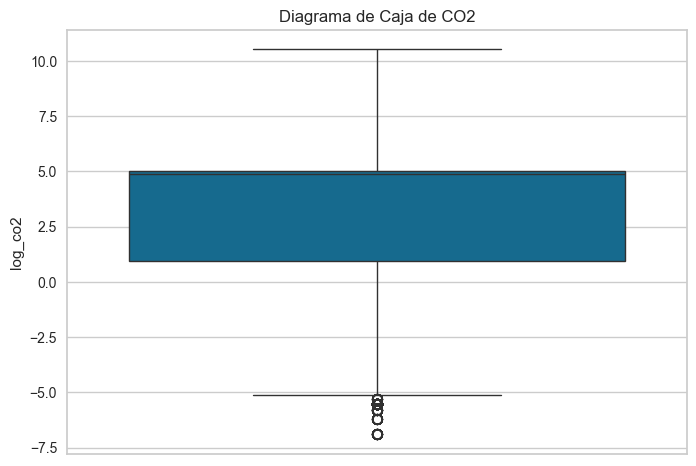

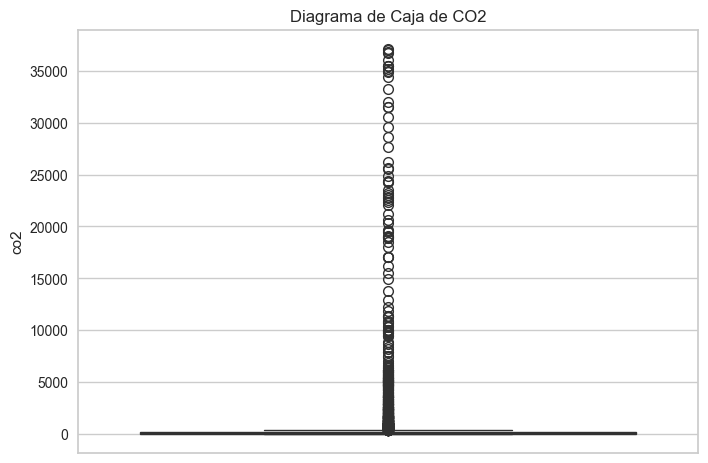

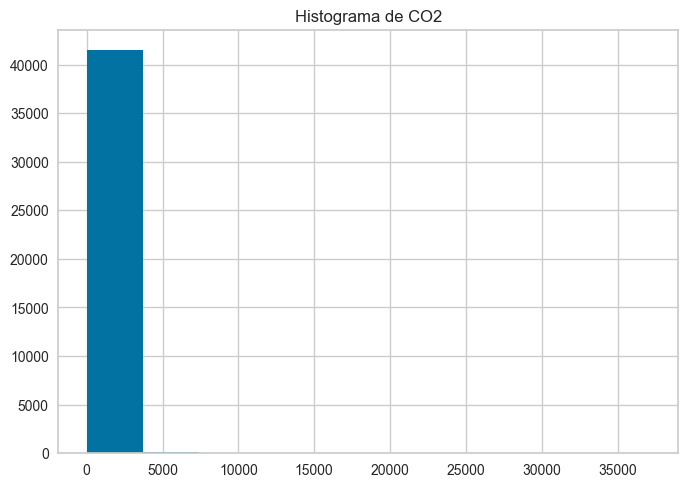

In [72]:
#Gráficos exploratorios del CO2.

import seaborn as sns
import matplotlib.pyplot as plt

for column in numeric_columnsOC:
    dataframeOC['log_' + column] = np.log(dataframeOC[column])

sns.boxplot(data=dataframeOC['log_co2'])
plt.title("Diagrama de Caja de CO2")
plt.show()

sns.boxplot(data=dataframeOC['co2'])
plt.title("Diagrama de Caja de CO2")
plt.show()

dataframeOC['co2'].hist()
plt.title("Histograma de CO2")
plt.show()

# Regresion


In [73]:
import pandas as pd

# Suponiendo que 'df' es tu DataFrame de Pandas que contiene tus datos

# Iterar sobre todas las columnas del DataFrame
for column in dfOC.columns:
    # Calcular el número total de datos en la columna
    total_count = len(dfOC[column])
    
    # Imprimir el nombre de la columna y el total de datos
    print(f"Columna: {column}", f"Cantidad de datos: {total_count}\n")



Columna: year Cantidad de datos: 41685

Columna: population Cantidad de datos: 41685

Columna: gdp Cantidad de datos: 41685

Columna: cement_co2 Cantidad de datos: 41685

Columna: cement_co2_per_capita Cantidad de datos: 41685

Columna: co2 Cantidad de datos: 41685

Columna: co2_growth_abs Cantidad de datos: 41685

Columna: co2_growth_prct Cantidad de datos: 41685

Columna: co2_including_luc Cantidad de datos: 41685

Columna: co2_including_luc_growth_abs Cantidad de datos: 41685

Columna: co2_including_luc_growth_prct Cantidad de datos: 41685

Columna: co2_including_luc_per_capita Cantidad de datos: 41685

Columna: co2_including_luc_per_gdp Cantidad de datos: 41685

Columna: co2_including_luc_per_unit_energy Cantidad de datos: 41685

Columna: co2_per_capita Cantidad de datos: 41685

Columna: co2_per_gdp Cantidad de datos: 41685

Columna: co2_per_unit_energy Cantidad de datos: 41685

Columna: coal_co2 Cantidad de datos: 41685

Columna: coal_co2_per_capita Cantidad de datos: 41685

Colum

In [74]:

# Iterar sobre todas las columnas del DataFrame
for column in dfOC.columns:
    # Calcular la frecuencia de cada valor en la columna
    frecuencia_valores = dfOC[column].value_counts()
    
    # Imprimir el nombre de la columna
    print(f"Columna: {column}", frecuencia_valores, "\n")


Columna: year year
1958    231
1966    231
1962    231
1961    231
1960    231
       ... 
1773     16
1772     16
1771     16
1770     16
1750     16
Name: count, Length: 273, dtype: int64 

Columna: population population
3.647223e+07    4410
9.050000e+02     100
1.747631e+07      32
2.580290e+05      22
3.000000e+04      20
                ... 
3.546520e+07       1
3.521458e+07       1
3.496573e+07       1
3.471863e+07       1
1.632054e+07       1
Name: count, Length: 36578, dtype: int64 

Columna: gdp gdp
2.677586e+11    27121
1.240018e+10        2
6.325920e+08        2
7.632000e+07        2
3.032706e+09        1
                ...  
1.708386e+10        1
1.929489e+10        1
1.982119e+10        1
2.100181e+10        1
2.271535e+10        1
Name: count, Length: 14562, dtype: int64 

Columna: cement_co2 cement_co2
5.095497    21839
0.000000     8457
0.007000       83
0.018000       81
0.029000       79
            ...  
4.173000        1
0.638000        1
1.948000        1
2.537000

In [75]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Se realizarán primero tres modelos para verificar la correlación que existe entre las emisiones de CO2 y las distintas industrias.

X = dfOC.drop(columns=['co2'])  # Características
y = dfOC['co2']  # Variable de respuesta

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo 1 - Regresión lineal simple: cement_co2 vs co2
model1 = LinearRegression()
model1.fit(X_train[['cement_co2']], y_train)
y1_pred = model1.predict(X_test[['cement_co2']])
r2_1 = r2_score(y_test, y1_pred)
rmse_1 = np.sqrt(mean_squared_error(y_test, y1_pred))

# Modelo 2 - Regresión lineal simple: gas_co2 vs co2
model2 = LinearRegression()
model2.fit(X_train[['gas_co2']], y_train)
y2_pred = model2.predict(X_test[['gas_co2']])
r2_2 = r2_score(y_test, y2_pred)
rmse_2 = np.sqrt(mean_squared_error(y_test, y2_pred))

# Modelo 3 - Regresión lineal múltiple: variables múltiples vs co2
model3 = LinearRegression()
model3.fit(X_train[['cement_co2', 'gas_co2', 'flaring_co2', 'coal_co2', 'oil_co2', 'other_industry_co2']], y_train)
y3_pred = model3.predict(X_test[['cement_co2', 'gas_co2', 'flaring_co2', 'coal_co2', 'oil_co2', 'other_industry_co2']])
r2_3 = r2_score(y_test, y3_pred)
rmse_3 = np.sqrt(mean_squared_error(y_test, y3_pred))

# Imprimir los coeficientes de determinación y RMSE
print("Coeficiente de determinación - Modelo 1:", r2_1)
print("RMSE - Modelo 1:", rmse_1)
print("Coeficiente de determinación - Modelo 2:", r2_2)
print("RMSE - Modelo 2:", rmse_2)
print("Coeficiente de determinación - Modelo 3:", r2_3)
print("RMSE - Modelo 3:", rmse_3)

Coeficiente de determinación - Modelo 1: 0.7679259811023392
RMSE - Modelo 1: 433.54530264035037
Coeficiente de determinación - Modelo 2: 0.8731270859269696
RMSE - Modelo 2: 320.55730709722076
Coeficiente de determinación - Modelo 3: 0.9981686789111366
RMSE - Modelo 3: 38.51265612092533


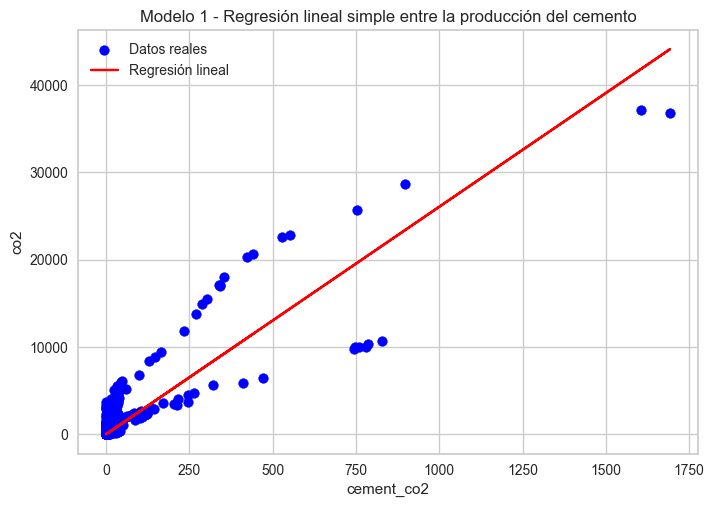

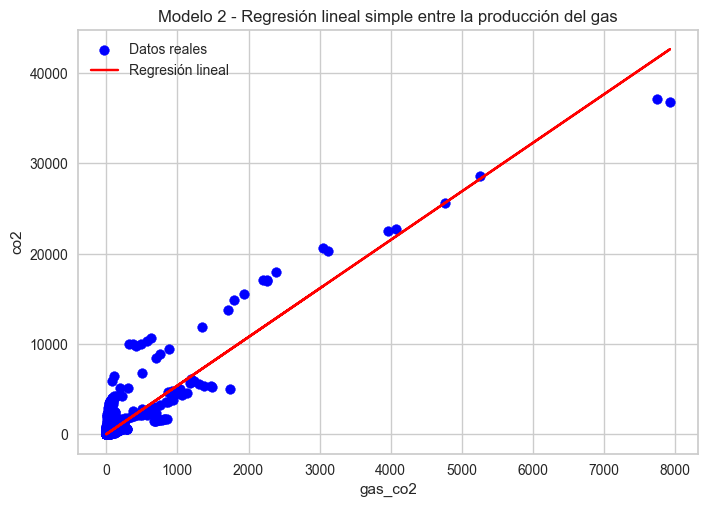

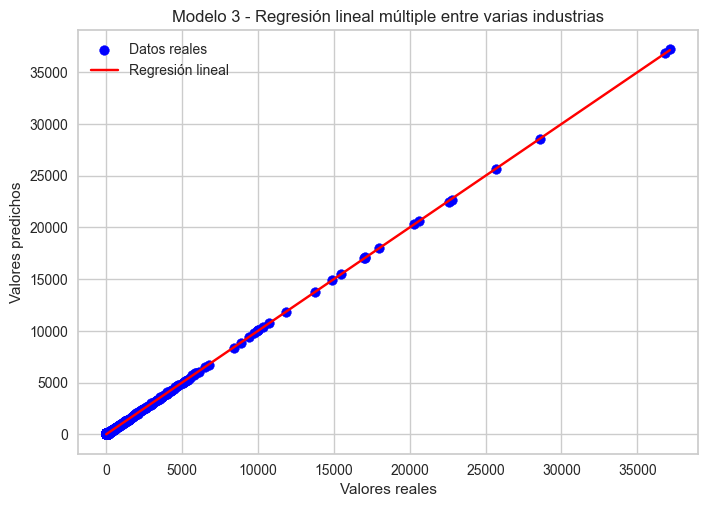

In [76]:
# Generar gráfica para el Modelo 1
plt.scatter(X_test['cement_co2'], y_test, color='blue', label='Datos reales')
plt.plot(X_test['cement_co2'], y1_pred, color='red', label='Regresión lineal')
plt.xlabel('cement_co2')
plt.ylabel('co2')
plt.title('Modelo 1 - Regresión lineal simple entre la producción del cemento')
plt.legend()
plt.show()

# Generar gráfica para el Modelo 2
plt.scatter(X_test['gas_co2'], y_test, color='blue', label='Datos reales')
plt.plot(X_test['gas_co2'], y2_pred, color='red', label='Regresión lineal')
plt.xlabel('gas_co2')
plt.ylabel('co2')
plt.title('Modelo 2 - Regresión lineal simple entre la producción del gas')
plt.legend()
plt.show()

# Generar gráfica para el Modelo 3
plt.scatter(y_test, y3_pred, color='blue', label='Datos reales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Regresión lineal')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Modelo 3 - Regresión lineal múltiple entre varias industrias')
plt.legend()
plt.show()

In [77]:
# Análisis de sobreajuste para estos tres modelos.

# Modelo 1
y1_train_pred = model1.predict(X_train[['cement_co2']])
y1_test_pred = model1.predict(X_test[['cement_co2']])
r2_1_train = r2_score(y_train, y1_train_pred)
r2_1_test = r2_score(y_test, y1_test_pred)

# Modelo 2
y2_train_pred = model2.predict(X_train[['gas_co2']])
y2_test_pred = model2.predict(X_test[['gas_co2']])
r2_2_train = r2_score(y_train, y2_train_pred)
r2_2_test = r2_score(y_test, y2_test_pred)

# Modelo 3
y3_train_pred = model3.predict(X_train[['cement_co2', 'gas_co2', 'flaring_co2', 'coal_co2', 'oil_co2', 'other_industry_co2']])
y3_test_pred = model3.predict(X_test[['cement_co2', 'gas_co2', 'flaring_co2', 'coal_co2', 'oil_co2', 'other_industry_co2']])
r2_3_train = r2_score(y_train, y3_train_pred)
r2_3_test = r2_score(y_test, y3_test_pred)

# Imprimir los coeficientes de determinación, RMSE y análisis de sobreajuste
print("Análisis de sobreajuste - Modelo 1:", r2_1_train - r2_1_test)
print("Análisis de sobreajuste - Modelo 2:", r2_2_train - r2_2_test)
print("Análisis de sobreajuste - Modelo 3:", r2_3_train - r2_3_test)

Análisis de sobreajuste - Modelo 1: 0.10283319790758627
Análisis de sobreajuste - Modelo 2: 0.06476338287166017
Análisis de sobreajuste - Modelo 3: 0.0005624377268659275


In [78]:
# Selección de características basada en correlación
correlated_features = set()
correlation_matrix = X_train.corr()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Eliminando columnas correlacionadas de X_train y X_test
X_train_corr_filtered = X_train.drop(columns=correlated_features)
X_test_corr_filtered = X_test.drop(columns=correlated_features)

# Selección de características basada en RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(X_train, y_train)
X_train_rfe_selected = X_train.iloc[:, selector.support_]
X_test_rfe_selected = X_test.iloc[:, selector.support_]

# Normalización de datos utilizando la estandarización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Error cuadrático medio: 1.4594427275365773
Raíz del error cuadrático medio (RMSE): 1.2080739743643918
Coeficiente de determinación (R^2): 0.9999981980422263
Variables predictoras seleccionadas:
Index(['other_co2_per_capita', 'other_industry_co2', 'share_global_co2',
       'share_global_coal_co2', 'share_global_cumulative_co2',
       'share_global_cumulative_coal_co2', 'temperature_change_from_ch4',
       'temperature_change_from_co2', 'temperature_change_from_ghg',
       'temperature_change_from_n2o'],
      dtype='object')


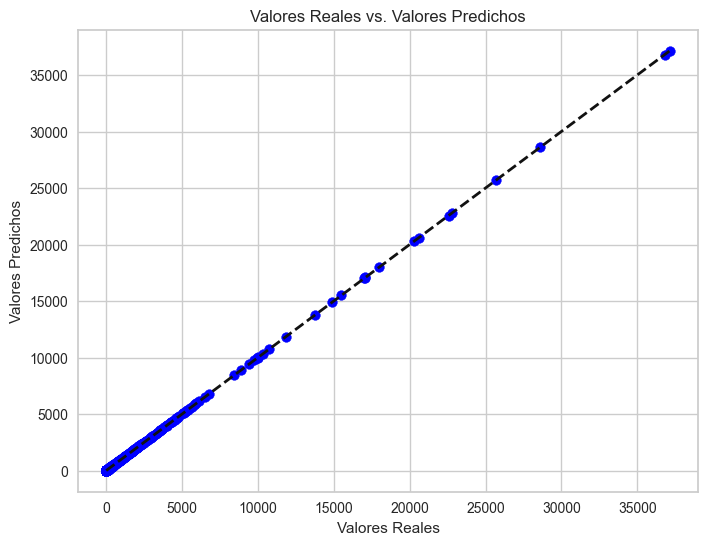

In [79]:
# Entrenamiento del modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)
# Calcular la raíz cuadrada del error cuadrático medio (RMSE)
rmse = mse ** 0.5
print("Raíz del error cuadrático medio (RMSE):", rmse)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R^2):", r2)

# Suponiendo que 'selector' es tu objeto RFE entrenado
selected_features_indices = selector.support_

# Obtén los nombres de las características seleccionadas
selected_features = X_train.columns[selected_features_indices]

print("Variables predictoras seleccionadas:")
print(selected_features)

# Gráfico de dispersión de los valores reales vs. predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos')
plt.show()


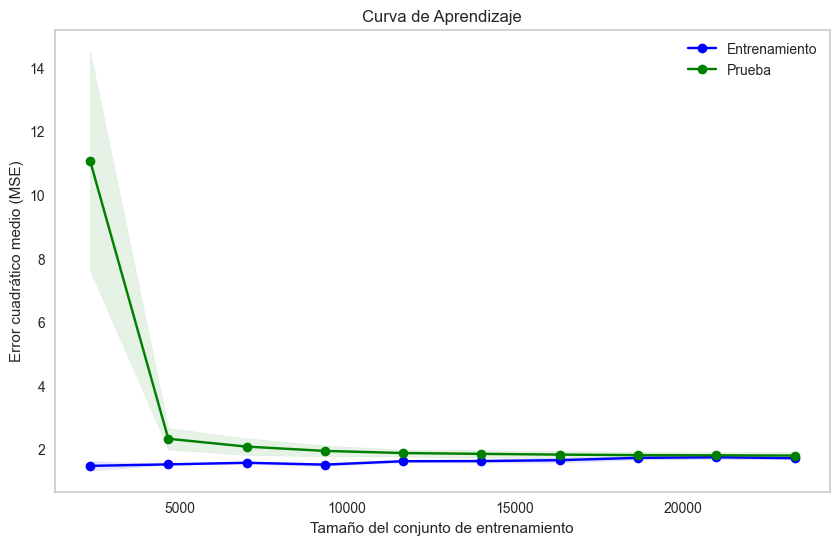

In [81]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(model, X, y):
    # Definir los tamaños de los conjuntos de entrenamiento
    train_sizes, train_scores, test_scores = learning_curve(
        estimator=model,
        X=X,
        y=y,
        train_sizes=np.linspace(0.1, 1.0, 10),
        cv=None,  # Sin validación cruzada
        scoring='neg_mean_squared_error',  # Métrica de rendimiento
        n_jobs=-1  # Utilizar todos los núcleos del procesador
    )

    # Calcular las medias y desviaciones estándar de los puntajes de entrenamiento y prueba
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Graficar la curva de aprendizaje
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Entrenamiento')
    plt.fill_between(train_sizes, 
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1, color='blue')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Prueba')
    plt.fill_between(train_sizes, 
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.1, color='green')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('Error cuadrático medio (MSE)')
    plt.title('Curva de Aprendizaje')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

# Llamar a la función para generar la curva de aprendizaje
plot_learning_curve(model, X_train_scaled, y_train)


Error cuadrático medio (Correlación): 149033.22580231345
Raíz del error cuadrático medio (RMSE) (Correlación): 386.0482169396893
Coeficiente de determinación (R^2) (Correlación): 0.8159903265099382


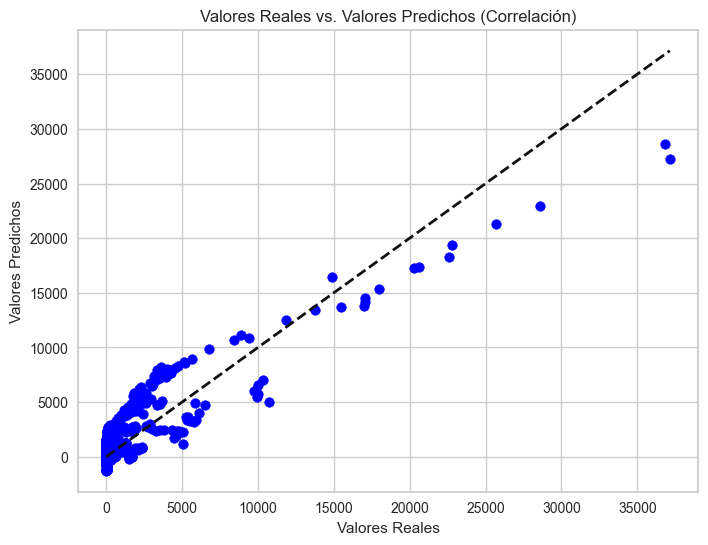

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Entrenamiento del modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_corr_filtered, y_train)  # Usando las variables filtradas por correlación

# Predicciones en el conjunto de prueba
y_pred_corr = model.predict(X_test_corr_filtered)

# Calcular el error cuadrático medio
mse_corr = mean_squared_error(y_test, y_pred_corr)
print("Error cuadrático medio (Correlación):", mse_corr)

# Calcular la raíz cuadrada del error cuadrático medio (RMSE)
rmse_corr = mse_corr ** 0.5
print("Raíz del error cuadrático medio (RMSE) (Correlación):", rmse_corr)

# Coeficiente de determinación (R^2)
r2_corr = r2_score(y_test, y_pred_corr)
print("Coeficiente de determinación (R^2) (Correlación):", r2_corr)

# Gráfico de dispersión de los valores reales vs. predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_corr, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos (Correlación)')
plt.show()


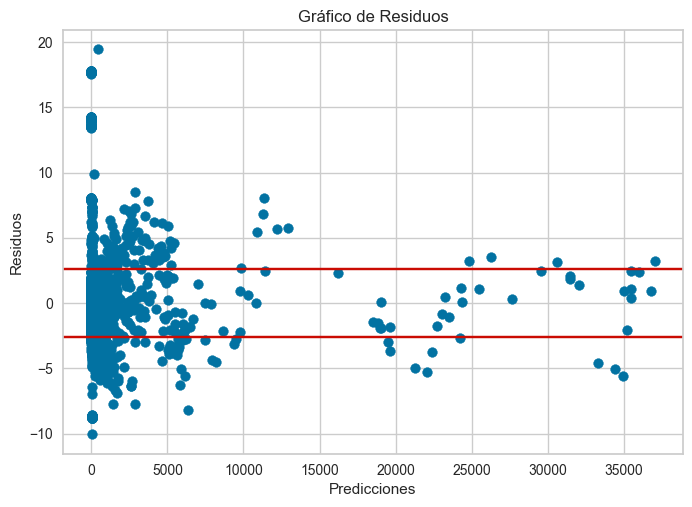

Puntos identificados como atípicos:
       year    population           gdp  cement_co2  cement_co2_per_capita  \
37467  2009  6.077000e+03  2.677586e+11    5.095497               0.070433   
17148  1945  7.137662e+07  4.820650e+11    0.000000               0.000000   
41519  1970  3.647223e+07  2.677586e+11    0.000000               0.070433   
45459  1926  4.616442e+07  3.558854e+11    5.095497               0.070433   
9089   1989  1.134415e+09  3.380560e+12   84.886000               0.075000   
...     ...           ...           ...         ...                    ...   
15367  1993  4.511800e+04  2.677586e+11    5.095497               0.070433   
3214   1796  3.647223e+07  2.677586e+11    5.095497               0.070433   
3192   1774  3.647223e+07  2.677586e+11    5.095497               0.070433   
45288  1755  3.647223e+07  2.677586e+11    5.095497               0.070433   
47463  1947  2.416694e+09  2.677586e+11   43.141000               0.018000   

       co2_growth_abs  co2_

In [62]:
# 1. Calcula los residuos
model = LinearRegression()
model.fit(X_train_scaled, y_train)
residuals = y_train - model.predict(X_train_scaled)

# 2. Calcula la desviación estándar de los residuos
residuals_std = np.std(residuals)

# 3. Define un umbral para identificar los atípicos
outlier_threshold = 2 * residuals_std  # Por ejemplo, usando 2 desviaciones estándar

# 4. Identifica los atípicos
outliers = X_train[np.abs(residuals) > outlier_threshold]

# 5. Visualiza los residuos para confirmar los atípicos
plt.scatter(model.predict(X_train_scaled), residuals)
plt.axhline(y=outlier_threshold, color='r', linestyle='-')
plt.axhline(y=-outlier_threshold, color='r', linestyle='-')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.show()

print("Puntos identificados como atípicos:")
print(outliers)

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

# Ajustar modelo lineal
modelo = ols('co2 ~ ' + ' + '.join(X_train_rfe_selected.columns), data=dfOC.loc[X_train_rfe_selected.index]).fit()

def analizar_residuos_con_umbrales(umbrales, modelo, X_train_rfe_selected, dfOC):
    resultados = {}
    
    for umbral in umbrales:
        # Identificar puntos atípicos utilizando el umbral dado
        residuos = modelo.resid
        mascara_atipicos = np.abs(residuos) > umbral
        mascara_atipicos = pd.Series(mascara_atipicos, index=dfOC.index)
        mascara_atipicos = mascara_atipicos.astype(bool)
        
        # Eliminar puntos atípicos y reajustar modelo
        datos_sin_atipicos = dfOC.loc[~mascara_atipicos, :]
        modelo_sin_atipicos = ols('co2 ~ ' + ' + '.join(X_train_rfe_selected.columns), data=datos_sin_atipicos).fit()

        # Almacenar resultados
        resultados[umbral] = {
            'R^2 original': modelo.rsquared,
            'R^2 sin puntos atípicos': modelo_sin_atipicos.rsquared,
            'Modelo sin atípicos': modelo_sin_atipicos
        }

    return resultados


# Definir una lista de umbrales
umbrales = [1 * np.std(modelo.resid), 2 * np.std(modelo.resid), 3 * np.std(modelo.resid), 4 * np.std(modelo.resid), 5 * np.std(modelo.resid), 6 * np.std(modelo.resid)]

# Llamar a la función para analizar los residuos con los umbrales dados
resultados = analizar_residuos_con_umbrales(umbrales, modelo, X_train_rfe_selected, dfOC)

# Imprimir los resultados
for umbral, resultado in resultados.items():
    print(f"Umbral: {umbral}")
    print(f"R^2 original: {resultado['R^2 original']}")
    print(f"R^2 sin puntos atípicos: {resultado['R^2 sin puntos atípicos']}")
    print()

Umbral: 163.0590790263109
R^2 original: 0.9774164672069364
R^2 sin puntos atípicos: 0.9478173727876961

Umbral: 326.1181580526218
R^2 original: 0.9774164672069364
R^2 sin puntos atípicos: 0.964248902578745

Umbral: 489.17723707893276
R^2 original: 0.9774164672069364
R^2 sin puntos atípicos: 0.978420234478275

Umbral: 652.2363161052436
R^2 original: 0.9774164672069364
R^2 sin puntos atípicos: 0.9778601354768963

Umbral: 815.2953951315545
R^2 original: 0.9774164672069364
R^2 sin puntos atípicos: 0.9757708776685474

Umbral: 978.3544741578655
R^2 original: 0.9774164672069364
R^2 sin puntos atípicos: 0.9763789129076464



# Clasificacion

In [14]:
import pandas as pd

# Leer el dataset
# Supongamos que dfOC es tu DataFrame
dfOC2 = dfOC.copy()

# Calcular la distribución de las clases
distribucion_clases = dfOC2['co2'].value_counts(normalize=True)

# Ordenar la distribución de las clases de forma descendente
distribucion_clases = distribucion_clases.sort_index(ascending=False)

# Definir los rangos y etiquetas de clase basados en la distribución de las clases
etiquetas = ['Alto', 'Moderado', 'Bajo', 'Muy Bajo']  # Clasificación basada en la distribución de las clases

# Clasificar las etiquetas basadas en la distribución de las clases
dfOC2['co2_clasificacion'] = pd.qcut(dfOC2['co2'], q=len(etiquetas), labels=etiquetas)

# Mostrar las primeras filas del DataFrame con la nueva columna de clase de CO2
print(dfOC2[['co2', 'co2_clasificacion']].head())

# Contar la frecuencia de aparición de cada etiqueta
frecuencia_etiquetas = dfOC2['co2_clasificacion'].value_counts()

# Mostrar el conteo de frecuencia de etiquetas
print("\nFrecuencia de aparición de cada etiqueta:")
print(frecuencia_etiquetas)

          co2 co2_clasificacion
0  150.344807              Bajo
1  150.344807              Bajo
2  150.344807              Bajo
3  150.344807              Bajo
4  150.344807              Bajo

Frecuencia de aparición de cada etiqueta:
co2_clasificacion
Bajo        18706
Alto        10423
Moderado    10420
Muy Bajo     2136
Name: count, dtype: int64


In [15]:

from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler

dfOC3 = dfOC2.copy()

# Dividir los datos en conjunto de características (X) y variable de respuesta (y)
XC = dfOC2.drop(columns=['co2_clasificacion'])  # Características
yC = dfOC2['co2_clasificacion']  # Variable de respuesta

# Dividir los datos en conjunto de entrenamiento y prueba manteniendo la proporción de clases
X_trainC, X_testC, y_trainC, y_testC = train_test_split(XC, yC, test_size=0.3, random_state=42, stratify=yC)

# Crear una instancia de SMOTEENN
smoteenn = SMOTEENN(random_state=42)

# Aplicar SMOTEENN al conjunto de entrenamiento
X_train_resampled, y_train_resampled = smoteenn.fit_resample(X_trainC, y_trainC)

# Contar la frecuencia de aparición de cada clase en el conjunto de datos de entrenamiento
frecuencia_clases_balanceadas = pd.Series(y_train_resampled).value_counts()

# Mostrar el conteo de frecuencia de clases balanceadas
print("Frecuencia de aparición de cada clase en el conjunto de datos de entrenamiento balanceado:")
print(frecuencia_clases_balanceadas)


Frecuencia de aparición de cada clase en el conjunto de datos de entrenamiento balanceado:
co2_clasificacion
Muy Bajo    11097
Bajo        10810
Moderado     7601
Alto         7472
Name: count, dtype: int64


Accuracy: 0.9660163121701584

Classification Report:
              precision    recall  f1-score   support

        Alto       1.00      0.99      1.00      3127
        Bajo       1.00      0.93      0.96      5612
    Moderado       0.91      1.00      0.95      3126
    Muy Bajo       0.87      1.00      0.93       641

    accuracy                           0.97     12506
   macro avg       0.94      0.98      0.96     12506
weighted avg       0.97      0.97      0.97     12506



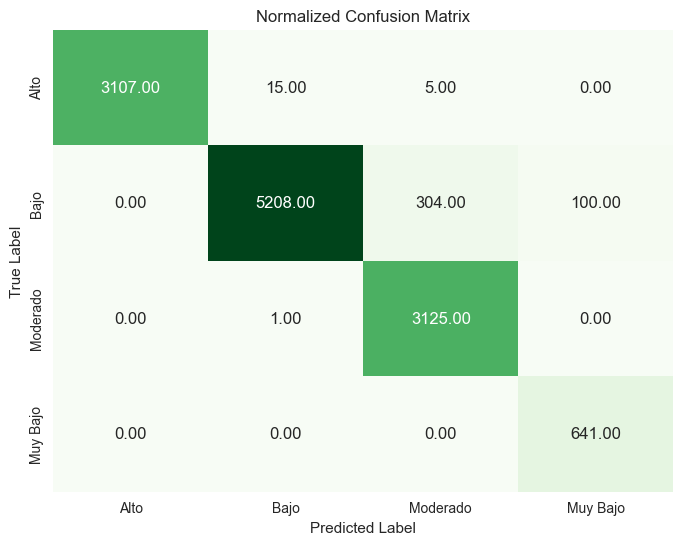

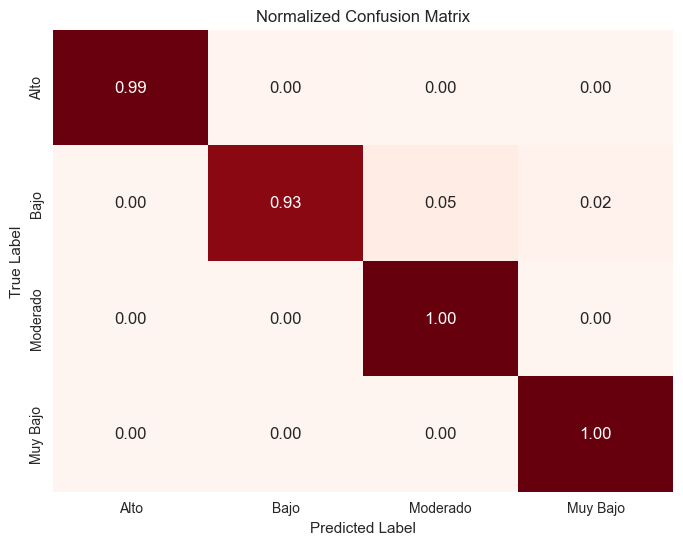

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Crear un clasificador Random Forest
rf_classifier1 = RandomForestClassifier(max_depth=10, random_state=42)

# Entrenar el modelo con los datos balanceados
rf_classifier1.fit(X_train_resampled, y_train_resampled)

# Predecir las etiquetas de clase para el conjunto de prueba
y_predC = rf_classifier1.predict(X_testC)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_testC, y_predC)
print("Accuracy:", accuracy)

# Mostrar el reporte de clasificación
print("\nClassification Report:")
print(classification_report(y_testC, y_predC))

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_testC, y_predC)
total_instances_per_class = conf_matrix.sum(axis=1)

# Normalizar la matriz de confusión dividiendo cada elemento por el total de instancias por clase
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='Greens', cbar=False, xticklabels=rf_classifier1.classes_, yticklabels=rf_classifier1.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_norm, annot=True, fmt='.2f', cmap='Reds', cbar=False, xticklabels=rf_classifier1.classes_, yticklabels=rf_classifier1.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix')
plt.show()

Cross-Validation Scores: [0.99921763 0.99973918 0.99973918 0.99960876 0.99921753]
Mean Cross-Validation Score: 0.9995044544175947


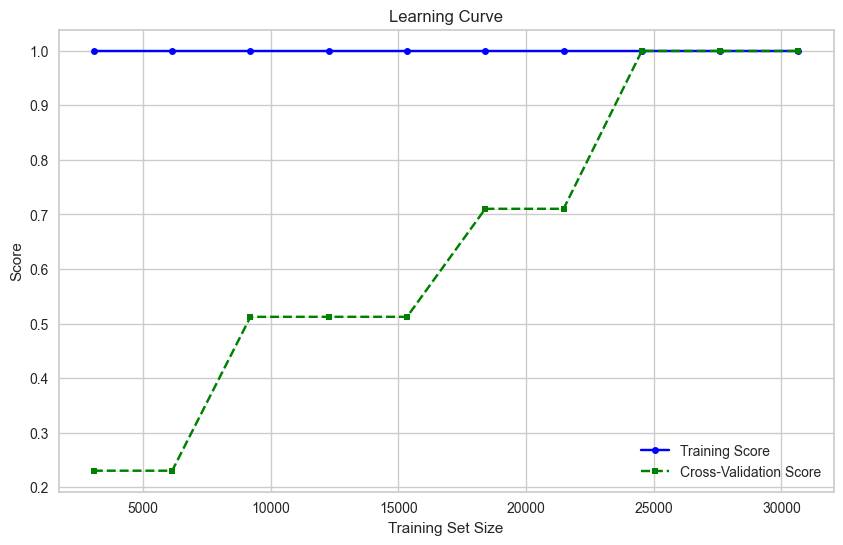

In [19]:
from sklearn.model_selection import cross_val_score, learning_curve
import matplotlib.pyplot as plt

def evaluate_model(model, X, y):
    # Validación cruzada
    cv_scores = cross_val_score(model, X, y, cv=5)
    print("Cross-Validation Scores:", cv_scores)
    print("Mean Cross-Validation Score:", cv_scores.mean())

    # Curva de Aprendizaje
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy', n_jobs=-1)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Cross-Validation Score')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    plt.xlabel('Training Set Size')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.title('Learning Curve')
    plt.show()

# Llamar a la función para evaluar el modelo
evaluate_model(rf_classifier1, X_train_resampled, y_train_resampled)

Accuracy: 0.9727330881177035

Classification Report:
              precision    recall  f1-score   support

        Alto       1.00      0.99      1.00      3127
        Bajo       1.00      0.94      0.97      5612
    Moderado       0.93      1.00      0.96      3126
    Muy Bajo       0.88      1.00      0.94       641

    accuracy                           0.97     12506
   macro avg       0.95      0.98      0.97     12506
weighted avg       0.97      0.97      0.97     12506



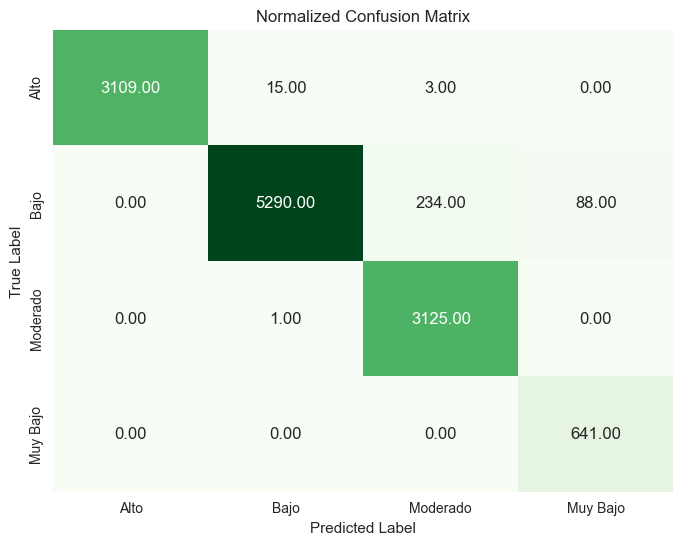

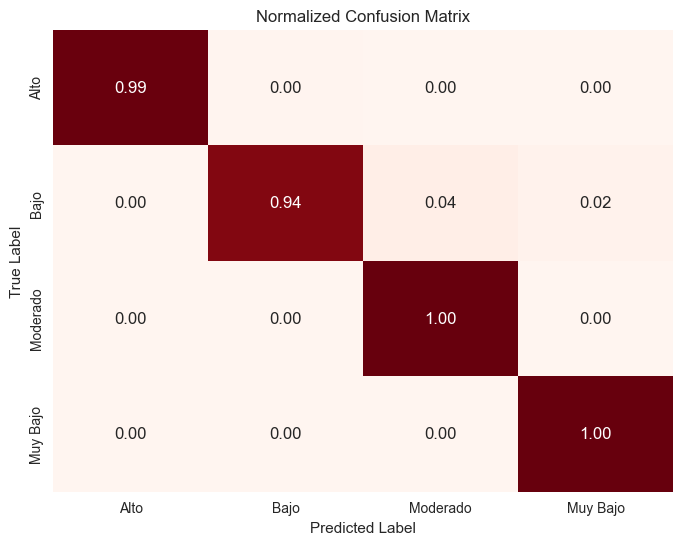

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# Crear un clasificador Random Forest
rf_classifier = RandomForestClassifier(random_state=42)

# Entrenar el modelo con los datos balanceados
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Predecir las etiquetas de clase para el conjunto de prueba
y_predC = rf_classifier.predict(X_testC)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_testC, y_predC)
print("Accuracy:", accuracy)

# Mostrar el reporte de clasificación
print("\nClassification Report:")
print(classification_report(y_testC, y_predC))

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_testC, y_predC)
total_instances_per_class = conf_matrix.sum(axis=1)

# Normalizar la matriz de confusión dividiendo cada elemento por el total de instancias por clase
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='Greens', cbar=False, xticklabels=rf_classifier1.classes_, yticklabels=rf_classifier1.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_norm, annot=True, fmt='.2f', cmap='Reds', cbar=False, xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix')
plt.show()

Cross-Validation Scores: [0.99921763 0.99973918 0.99973918 0.99960876 0.99921753]
Mean Cross-Validation Score: 0.9995044544175947


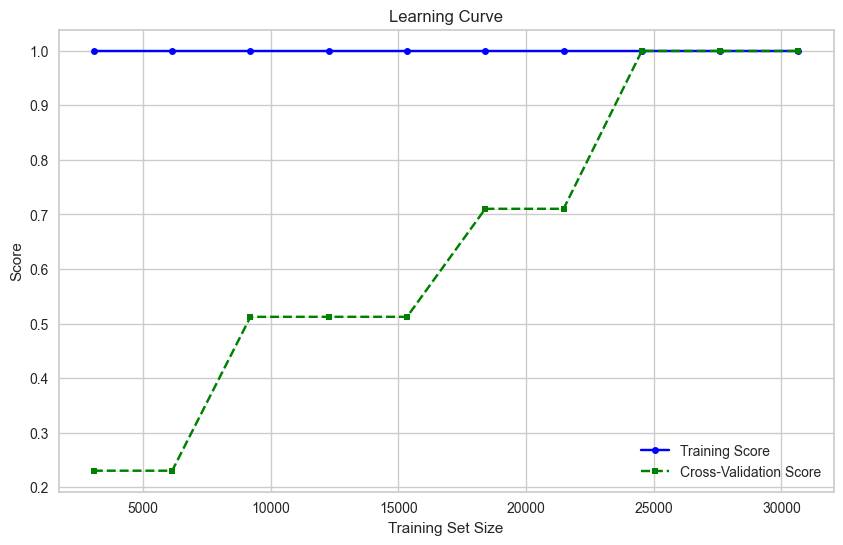

In [21]:
from sklearn.model_selection import cross_val_score, learning_curve
import matplotlib.pyplot as plt

def evaluate_model(model, X, y):
    # Validación cruzada
    cv_scores = cross_val_score(model, X, y, cv=5)
    print("Cross-Validation Scores:", cv_scores)
    print("Mean Cross-Validation Score:", cv_scores.mean())

    # Curva de Aprendizaje
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy', n_jobs=-1)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Cross-Validation Score')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    plt.xlabel('Training Set Size')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.title('Learning Curve')
    plt.show()

# Llamar a la función para evaluar el modelo
evaluate_model(rf_classifier, X_train_resampled, y_train_resampled)


# SVM

In [33]:
from sklearn.svm import SVR, SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import learning_curve

In [28]:
# Definir las características seleccionadas
selected_columns = ['cement_co2', 'gas_co2', 'flaring_co2', 'coal_co2', 'oil_co2', 'other_industry_co2']

X = dfOC[selected_columns]  # Características
y = dfOC['co2']  # Variable de respuesta

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Definir preprocesamiento para características categóricas
categorical_features = []  # Si tienes características categóricas, agrégalas aquí
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Manejar valores faltantes
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Codificar características categóricas
])

# Definir preprocesamiento para características numéricas
numeric_features = X.columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Manejar valores faltantes
    ('scaler', StandardScaler())  # Escalar características numéricas
])

# Combinar preprocesadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Definir modelo SVM lineal
svm_linear = SVR(kernel='linear')

# Definir parámetros a ajustar
parameters_linear = {'svm__C': [0.001, 0.01]} 

# Construir pipeline con preprocesamiento y modelo
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('svm', svm_linear)])


# Búsqueda de hiperparámetros con GridSearchCV y cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=parameters_linear, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


# Imprimir el mejor valor de C encontrado por la búsqueda
print("Mejor valor de C:", grid_search.best_params_['svm__C'])

# Obtener el mejor modelo encontrado por la búsqueda
best_svm = grid_search.best_estimator_

# Predecir en el conjunto de prueba y calcular el error
y_pred = best_svm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio en conjunto de prueba:", mse)
mae = mean_absolute_error(y_test, y_pred)
print("Error Absoluto Medio (MAE):", mae)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de Determinación (R^2):", r2)

Mejor valor de C: 0.01
Error cuadrático medio en conjunto de prueba: 540535.6471932912
Error Absoluto Medio (MAE): 200.64973845044503
Coeficiente de Determinación (R^2): 0.34453468618598937


C:\Users\Alvar\AppData\Local\Temp\ipykernel_15816\1704498043.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Línea de Identidad')


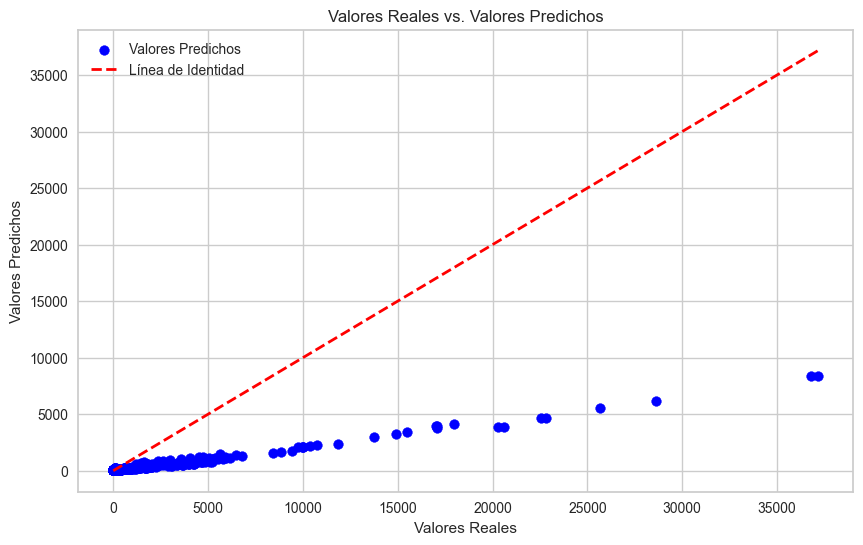

In [29]:
import matplotlib.pyplot as plt

# Graficar los valores reales vs. los valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Valores Predichos')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Línea de Identidad')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos')
plt.legend()
plt.show()


In [16]:
# Separar las características y el objetivo
target = dfOC3.pop('co2_clasificacion')
data = dfOC3


In [20]:

# Dividir los datos en entrenamiento y prueba
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.3, train_size=0.7)

# Obtener nombres de columnas categóricas y numéricas
nombre_categoricas = []
nombre_numericas = []
for i in dfOC3.columns:
    if i != 'co2_clasificacion':
        if dfOC3[i].dtype == 'object':  # Verificar si la columna es categórica
            nombre_categoricas.append(i)
        else:
            nombre_numericas.append(i)

# Preprocesamiento para características numéricas
numeric_preprocessor = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

# Preprocesamiento para características categóricas
categorical_preprocessor = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")), ("onehot", OneHotEncoder(handle_unknown="ignore"))]
)

# Combinar preprocesadores
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_preprocessor, nombre_numericas),
        ("cat", categorical_preprocessor, nombre_categoricas)
    ]
)

In [51]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

modelo_rbf = make_pipeline(preprocessor, SVC(kernel="rbf", C=1.0))

# Imprimir la estructura del modelo
from sklearn import set_config
set_config(display='diagram')
print(modelo_rbf)

# Entrenar el modelo
_ = modelo_rbf.fit(data_train, target_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'population', 'gdp',
                                                   'cement_co2',
                                                   'cement_co2_per_capita',
                                                   'co2', 'co2_growth_abs',
                                                   'co2_growth_prct',
                                                   'co2_including_luc',
                                                   'co2_including_luc_growth_abs',
                                      

Accuracy: 0.9159603390372622
Precision: 0.9191911378350616
Recall: 0.9159603390372622


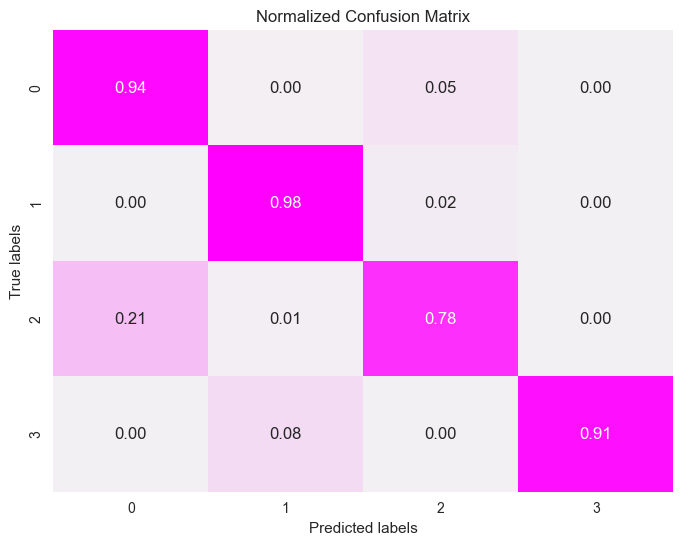

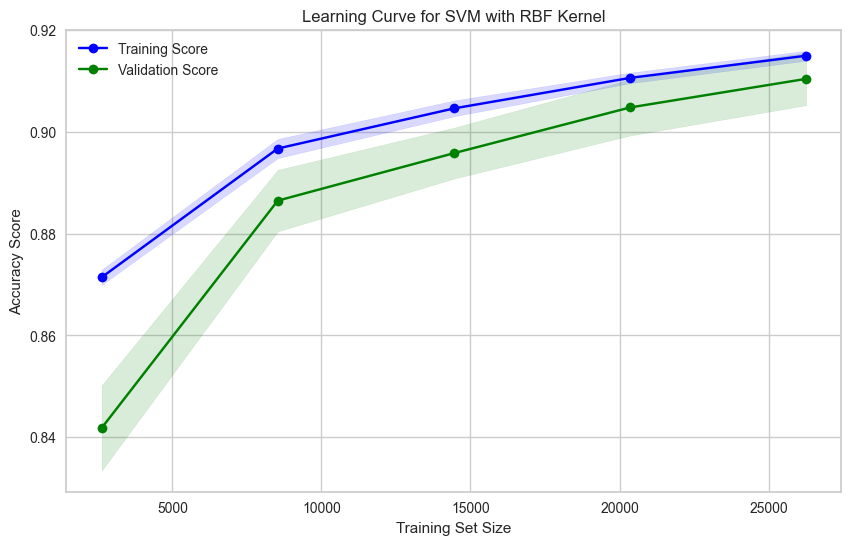

In [55]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve

# Predicciones del modelo
target_pred = modelo_rbf.predict(data_test)

# Métricas de evaluación
print("Accuracy:", metrics.accuracy_score(target_test, target_pred))
print("Precision:", metrics.precision_score(target_test, target_pred, average='weighted'))
print("Recall:", metrics.recall_score(target_test, target_pred, average='weighted'))


# Matriz de confusión
cm = confusion_matrix(target_test, target_pred)

# Normaliza la matriz de confusión
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Configura el estilo y los colores
cmap = sns.light_palette("magenta", as_cmap=True)

# Crea el gráfico de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_norm, annot=True, cmap=cmap, fmt=".2f", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Normalized Confusion Matrix')
plt.show()


# Curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(modelo_rbf, data_train, target_train, cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.title('Learning Curve for SVM with RBF Kernel')
plt.show()


In [21]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

data_train, data_test,target_train, target_test = train_test_split(data, target,test_size=0.3,train_size=0.7)

nombre_categoricas = []

nombre_numericas = []
for i in dfOC3.columns:
    if i not in nombre_categoricas:
        nombre_numericas.append(i)

categoricas = dfOC3[nombre_categoricas]
numericas = dfOC3[nombre_numericas]

numeric_preprocessor = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

# Se preparan los preprocesadores
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")


#Se transforman las colunas usando los preprocesadores
from sklearn.compose import ColumnTransformer

preprocesador = ColumnTransformer([
    ('one_hot_encoder',categorical_preprocessor,nombre_categoricas),
    ('numerico', numeric_preprocessor,nombre_numericas)
],remainder="passthrough")

In [65]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

modelo3 = make_pipeline(preprocesador, SVC(kernel="poly", C=5, degree=2))

# Esto nos permite ver dentro del modelo
from sklearn import set_config
set_config(display='diagram')
modelo3

_=modelo3.fit(data_train,target_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  []),
                                                 ('numerico',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'population', 'gdp',
                                                   'cement_co2',
                                                   'cement_co2_per_capita',
                                                   'co2', 'c

Accuracy: 0.8757396449704142
Precision: 0.8837179299223074
Recall:  0.8757396449704142


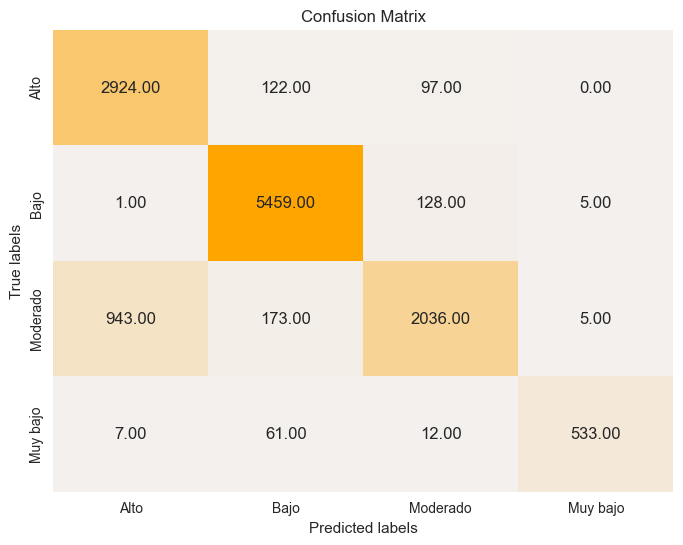

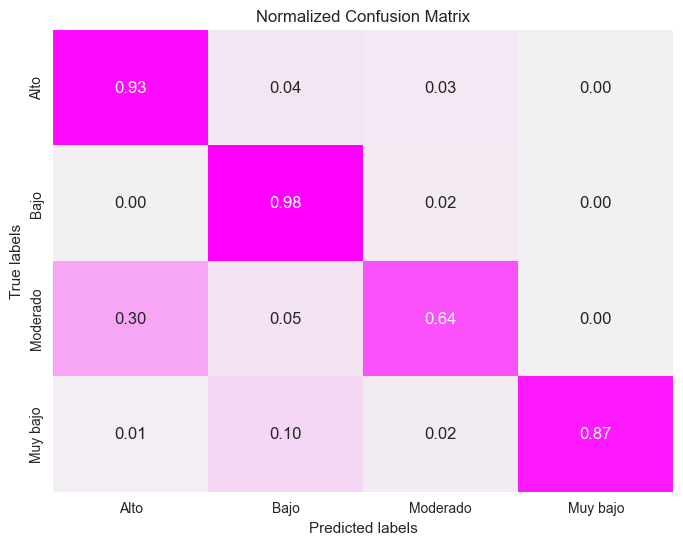

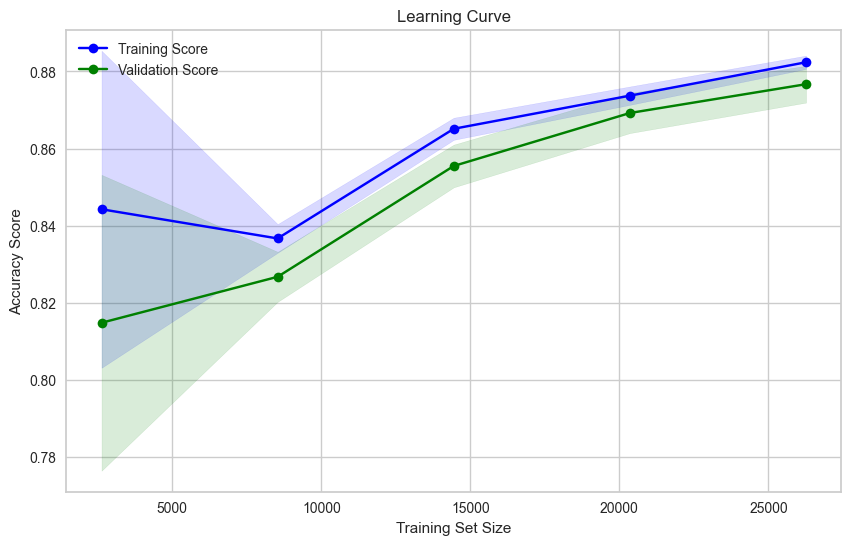

In [74]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import learning_curve
import numpy as np
import seaborn as sns

target_pred = modelo3.predict(data_test)
print ("Accuracy:",metrics.accuracy_score(target_test, target_pred))
print ("Precision:", metrics.precision_score(target_test,target_pred,average='weighted') )
print ("Recall: ", metrics.recall_score(target_test,target_pred,average='weighted'))

clases = ["Alto", "Bajo", "Moderado", "Muy bajo"]

# Calcula la matriz de confusión
cm = confusion_matrix(target_test, target_pred)

# Configura el estilo y los colores
cmap = sns.light_palette("orange", as_cmap=True)

# Crea el gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap=cmap, fmt=".2f", cbar=False, xticklabels=clases, yticklabels=clases)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Normaliza la matriz de confusión
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Configura el estilo y los colores
cmap = sns.light_palette("magenta", as_cmap=True)

# Crea el gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(cm_norm, annot=True, cmap=cmap, fmt=".2f", cbar=False, xticklabels=clases, yticklabels=clases)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Normalized Confusion Matrix')
plt.show()

# Calcular y plotear las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(modelo3, data_train, target_train, cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.title('Learning Curve')
plt.show()

In [62]:
from sklearn.pipeline import make_pipeline

# Se construye el modelo SVC con kernel 'sigmoid' y preprocesamiento
modelo = make_pipeline(preprocesador, SVC(kernel="sigmoid", C=0.08))

# Entrenar el modelo
_=modelo.fit(data_train, target_train)

# Esto nos permite ver dentro del modelo
from sklearn import set_config
set_config(display='diagram')
modelo

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  []),
                                                 ('numerico',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'population', 'gdp',
                                                   'cement_co2',
                                                   'cement_co2_per_capita',
                                                   'co2', 'co2_growth_abs',
                                                   'co2_...
                                                   'co2_per_unit_energy',
                                                   'coal_co2',
                                                   'coal_co2_per_capita',
                                                   'consumption_co2',
                                                   'consumption_co2_per_capita',
                                                   'consumption_co2_per_gdp',
                                                   'cumulative_cement_co2',
                                                   'cumulative_co2',
                                                   'cumulative_co2_including_luc',
                                                   'cumulative_coal_co2',
                                                   'cumulative_flaring_co2',
                                                   'cumulative_gas_co2',
                                                   'cumulative_luc_co2',
                                                   'cumulative_oil_co2', ...])])),
                ('svc', SVC(C=0.08, kernel='sigmoid'))])

Accuracy: 0.7753078522309291
Precision: 0.7718813815532212
Recall: 0.7753078522309291


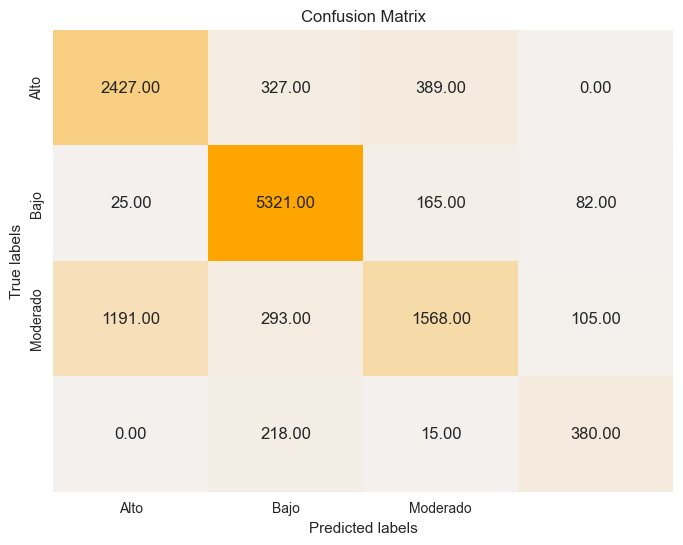

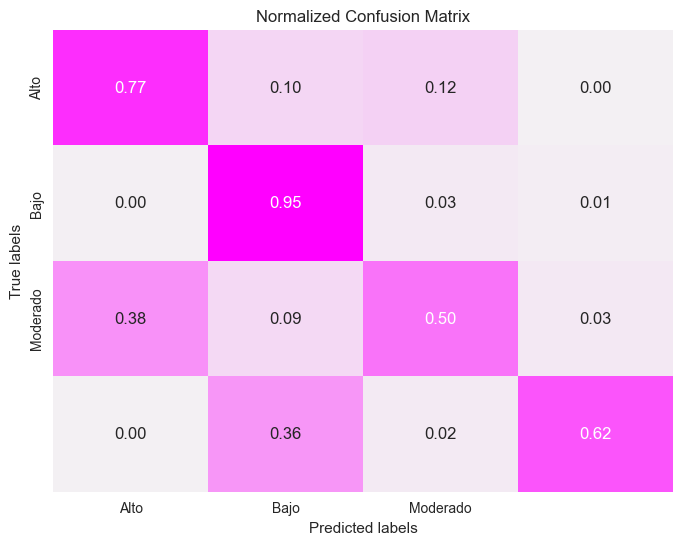

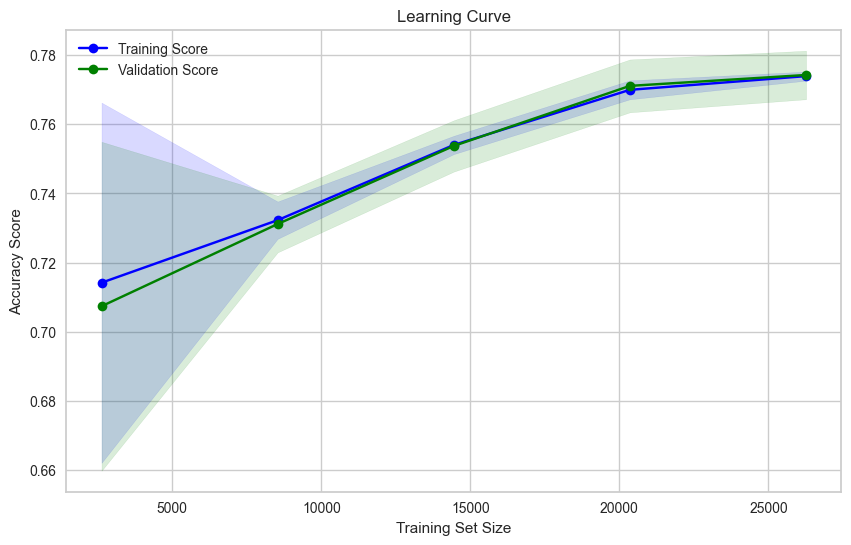

In [77]:
# Predecir en el conjunto de prueba
target_pred_sigmoid = modelo.predict(data_test)

# Calcular métricas de desempeño
print("Accuracy:", metrics.accuracy_score(target_test, target_pred_sigmoid))
print("Precision:", metrics.precision_score(target_test, target_pred_sigmoid, average='weighted'))
print("Recall:", metrics.recall_score(target_test, target_pred_sigmoid, average='weighted'))

clases = ["Alto", "Bajo", "Moderado"]

# Calcula la matriz de confusión
cm = confusion_matrix(target_test, target_pred_sigmoid)

# Configura el estilo y los colores
cmap = sns.light_palette("orange", as_cmap=True)

# Crea el gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap=cmap, fmt=".2f", cbar=False, xticklabels=clases, yticklabels=clases)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Normaliza la matriz de confusión
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Configura el estilo y los colores
cmap = sns.light_palette("magenta", as_cmap=True)

# Crea el gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(cm_norm, annot=True, cmap=cmap, fmt=".2f", cbar=False, xticklabels=clases, yticklabels=clases)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Normalized Confusion Matrix')
plt.show()

# Calcular y plotear las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(modelo, data_train, target_train, cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.title('Learning Curve')
plt.show()

# RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Crear un objeto de Random Forest Regressor
random_forest = RandomForestRegressor(random_state=42)

# Parámetros a ajustar
parameters_rf = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
    'max_depth': [None, 5, 10],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4]  # Número mínimo de muestras requeridas para estar en un nodo hoja
}

# Búsqueda de hiperparámetros con GridSearchCV y cross-validation
grid_search = GridSearchCV(estimator=random_forest, param_grid=parameters_rf, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Imprimir los mejores parámetros encontrados por la búsqueda
print("Mejores parámetros:", grid_search.best_params_)

# Obtener el mejor modelo encontrado por la búsqueda
best_rf = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_rf.predict(X_test_scaled)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio en conjunto de prueba:", mse)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Error absoluto medio en conjunto de prueba:", mae)

# Calcular el coeficiente de determinación (R²)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R²) en conjunto de prueba:", r2)


In [ ]:
import pickle

# Guardar el mejor modelo encontrado por la búsqueda
with open('randomForestRegressor.pkl', 'wb') as archivo:
    pickle.dump(best_rf, archivo)

# Luego, puedes cargar el modelo más tarde si es necesario
# with open('mejor_modelo_rf.pkl', 'rb') as archivo:
#     mejor_modelo_cargado = pickle.load(archivo)


In [90]:
import pickle
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Cargar el modelo desde el archivo
with open('randomForestRegressor.pkl', 'rb') as archivo:
    mejor_modelo_cargado = pickle.load(archivo)

# Ahora puedes usar el modelo cargado para hacer predicciones en nuevos datos
# Supongamos que tienes un nuevo conjunto de datos llamado X_nuevo
y_pred = mejor_modelo_cargado.predict(X_test_scaled)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio en conjunto de prueba:", mse)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Error absoluto medio en conjunto de prueba:", mae)

# Calcular el coeficiente de determinación (R²)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R²) en conjunto de prueba:", r2)

Error cuadrático medio en conjunto de prueba: 8741.312937881052
Error absoluto medio en conjunto de prueba: 3.329363732753845
Coeficiente de determinación (R²) en conjunto de prueba: 0.9892071977177255


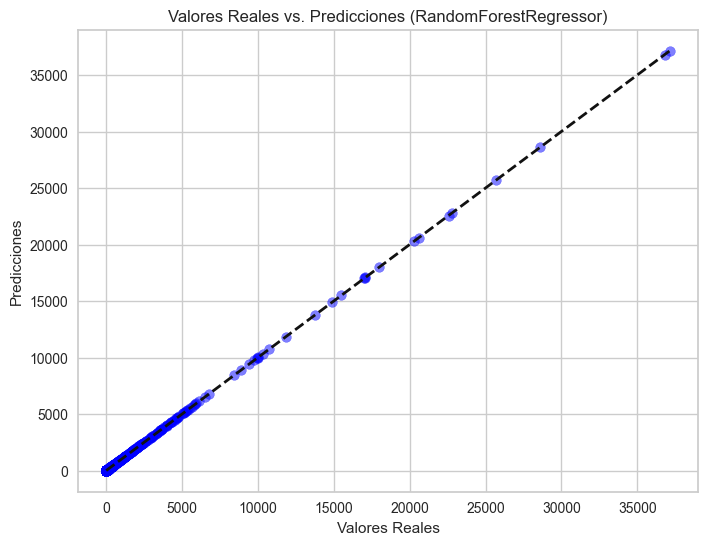

In [83]:
import matplotlib.pyplot as plt

# Graficar los valores reales vs. las predicciones
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones (RandomForestRegressor)')
plt.show()


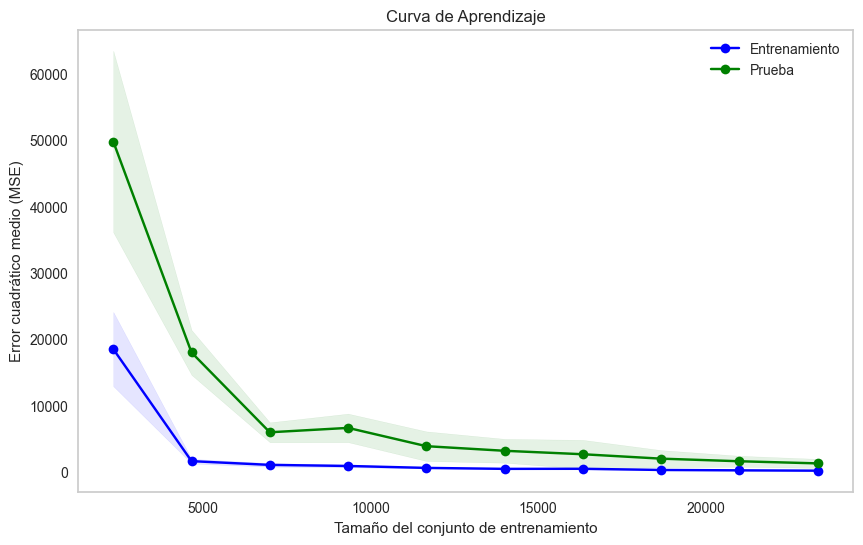

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y):
    # Definir los tamaños de los conjuntos de entrenamiento
    train_sizes, train_scores, test_scores = learning_curve(
        estimator=model,
        X=X,
        y=y,
        train_sizes=np.linspace(0.1, 1.0, 10),
        cv=None,  # Sin validación cruzada
        scoring='neg_mean_squared_error',  # Métrica de rendimiento
        n_jobs=-1  # Utilizar todos los núcleos del procesador
    )

    # Calcular las medias y desviaciones estándar de los puntajes de entrenamiento y prueba
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Graficar la curva de aprendizaje
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Entrenamiento')
    plt.fill_between(train_sizes, 
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1, color='blue')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Prueba')
    plt.fill_between(train_sizes, 
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.1, color='green')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('Error cuadrático medio (MSE)')
    plt.title('Curva de Aprendizaje')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

# Llamar a la función para generar la curva de aprendizaje
plot_learning_curve(mejor_modelo_cargado, X_train_scaled, y_train)
